In [1]:
# 모형 최적화: 파라미터 튜닝
# ref: https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import matplotlib as mpl
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

### Validation Curve: 성능 기준 세팅
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits= load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)

In [2]:
%%time
train_scores, test_scores = validation_curve(
                                SVC(), X, y, 
                                param_name="gamma", 
                                param_range=param_range,
                                cv=10, 
                                scoring="accuracy",
                                n_jobs=1  # number of jobs to run in parallel: -1 means using all processors
)

CPU times: user 52.7 s, sys: 111 ms, total: 52.8 s
Wall time: 53 s


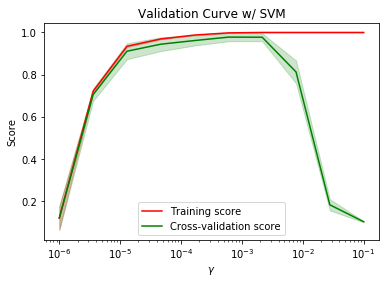

In [5]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.title("Validation Curve w/ SVM")
plt.show()

In [7]:
### Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # substracts mean, unit variant
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])
param_range = [ np.exp(-4+i) for i in range(8) ]
param_grid = [
    {'clf__C' : param_range, 'clf__kernel': ['linear']},
    {'clf__C' : param_range, 'clf__gamma': param_range, 'clf__kernel':['rbf']}
]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)
%time gs = gs.fit(X, y)

CPU times: user 5min 17s, sys: 2.1 s, total: 5min 19s
Wall time: 5min 19s


In [8]:
gs.cv_results_["params"]

[{'clf__C': 0.01831563888873418, 'clf__kernel': 'linear'},
 {'clf__C': 0.049787068367863944, 'clf__kernel': 'linear'},
 {'clf__C': 0.1353352832366127, 'clf__kernel': 'linear'},
 {'clf__C': 0.36787944117144233, 'clf__kernel': 'linear'},
 {'clf__C': 1.0, 'clf__kernel': 'linear'},
 {'clf__C': 2.718281828459045, 'clf__kernel': 'linear'},
 {'clf__C': 7.38905609893065, 'clf__kernel': 'linear'},
 {'clf__C': 20.085536923187668, 'clf__kernel': 'linear'},
 {'clf__C': 0.01831563888873418,
  'clf__gamma': 0.01831563888873418,
  'clf__kernel': 'rbf'},
 {'clf__C': 0.01831563888873418,
  'clf__gamma': 0.049787068367863944,
  'clf__kernel': 'rbf'},
 {'clf__C': 0.01831563888873418,
  'clf__gamma': 0.1353352832366127,
  'clf__kernel': 'rbf'},
 {'clf__C': 0.01831563888873418,
  'clf__gamma': 0.36787944117144233,
  'clf__kernel': 'rbf'},
 {'clf__C': 0.01831563888873418, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'},
 {'clf__C': 0.01831563888873418,
  'clf__gamma': 2.718281828459045,
  'clf__kernel': 'rbf'},
 {

In [9]:
gs.cv_results_["mean_test_score"]

array([0.95436839, 0.95715081, 0.95770729, 0.95770729, 0.95826377,
       0.95826377, 0.95826377, 0.95826377, 0.67501391, 0.21368948,
       0.10239288, 0.10127991, 0.10127991, 0.10127991, 0.11185309,
       0.11185309, 0.89426822, 0.7968837 , 0.10406233, 0.10127991,
       0.10127991, 0.10127991, 0.11185309, 0.11185309, 0.92487479,
       0.89315526, 0.22426266, 0.10127991, 0.10127991, 0.10127991,
       0.11185309, 0.11185309, 0.94880356, 0.93377852, 0.59933222,
       0.11074012, 0.10127991, 0.10127991, 0.11185309, 0.11185309,
       0.96605454, 0.95659432, 0.85141903, 0.38397329, 0.11908737,
       0.10239288, 0.10127991, 0.10127991, 0.9705064 , 0.95882026,
       0.8558709 , 0.42459655, 0.12966055, 0.10350584, 0.10127991,
       0.10127991, 0.96828047, 0.95882026, 0.8558709 , 0.42459655,
       0.12966055, 0.10350584, 0.10127991, 0.10127991, 0.96828047,
       0.95882026, 0.8558709 , 0.42459655, 0.12966055, 0.10350584,
       0.10127991, 0.10127991])

In [10]:
print(gs.best_score_)
print(gs.best_params_)

0.9705063995548135
{'clf__C': 2.718281828459045, 'clf__gamma': 0.01831563888873418, 'clf__kernel': 'rbf'}


In [11]:
### Parameter Grid: 임의의 파라미터 조합하여 탐색할 경우
from sklearn.model_selection import ParameterGrid

# for example,
param_grid = {'a':[1,2], 'b': [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [12]:
param_grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [13]:
### 병렬 처리: GridSearchCV나 validation_curve의 n_jobs 값을 늘려주면 parallel processor 사용 가능